# Load files & download

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap


%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
!pip install transformers

In [22]:
df_p = pd.read_csv("/content/drive/MyDrive/thesis_project_files/main_label/all_P.csv")
df_r = pd.read_csv("/content/drive/MyDrive/thesis_project_files/main_label/all_R.csv")

In [23]:
df_p = df_p.drop(['Duration', 'comment', 'Role','combine'], axis=1)
df_r = df_r.drop(['Duration', 'comment', 'Role','combine'], axis=1)
df_r = df_r.rename(columns={"Label":"label", "clean_text":"text"})
df_p = df_p.rename(columns={"Label":"label", "clean_text":"text"})



In [38]:
P_labels=['design action', 'failure action','failure reasoning', 'information','perception']
R_labels=['clarification','failure','implementation','introduction','workshop management']

In [24]:
def exclude(df, labels):
  exclude_idx=[]
  for d in range(0, len(df['label'])):
      if  df['label'][d] not in labels:
          exclude_idx.append(d)
  return df.drop(index=(exclude_idx))


df_r=exclude(df_r, R_labels)
df_p=exclude(df_p, P_labels)

In [25]:
#P_labels=['information','design action', 'failure action','failure reasoning', 'perception']

def convert_p(label):
  label=str(label)
  if label=='information':
      return 0
  elif label=='design action':
      return 1
  elif label=='failure action':
      return 2
  elif label=='failure reasoning':
      return 3
  else:
      return 4

df_p['index']=df_p['label'].apply(convert_p)

In [26]:
def convert(label):
  label=str(label)
  if label=='introduction':
      return 0
  elif label=='clarification':
      return 1
  elif label=='workshop management':
      return 2
  elif label=='implementation':
      return 3
  else:
      return 4

df_r['index']=df_r['label'].apply(convert)

In [27]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True')
  plt.xlabel('Predicted');



# zeroshot



In [39]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from transformers import *

def model_pipeline(model_name, df, candidate_labels):

  classifier=pipeline("zero-shot-classification",model=model_name)

  predict=[]
  true=[]
  for i in tqdm(range(0, len(df))):
    text = df.iloc[i,]['text']
    cat = df.iloc[i,]['label']
    res = classifier(text, candidate_labels, multi_label=False)
    labels = res['labels'][0]

    predict.append(labels)
    true.append(cat)

  cm = confusion_matrix(true, predict)
  df_cm = pd.DataFrame(cm, index=candidate_labels, columns=candidate_labels)
  show_confusion_matrix(df_cm)

  return(classification_report(true, predict, target_names=candidate_labels))

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/config.json
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Model config DistilBertConfig {
  "_name_or_path": "typeform/distilbert-base-uncased-mnli",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "mnli",
  "hidden_dim": 3072,
  "id2label": {
    "0": "ENTAILMENT",
    "1": "NEUTRAL",
    "2": "CONTRADICTION"
  },
  "initializer_range": 0.02,
  "label2id": {
    "CONTRADICTION": 2,
    "ENTAILMENT": 0,
    "NEUTRAL": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0

'                   precision    recall  f1-score   support\n\n    design action       0.31      0.03      0.06       555\n   failure action       0.00      0.00      0.00       131\nfailure reasoning       0.29      0.01      0.02       535\n      information       0.20      0.54      0.29       240\n       perception       0.21      0.63      0.32       359\n\n         accuracy                           0.21      1820\n        macro avg       0.20      0.24      0.14      1820\n     weighted avg       0.25      0.21      0.12      1820\n'

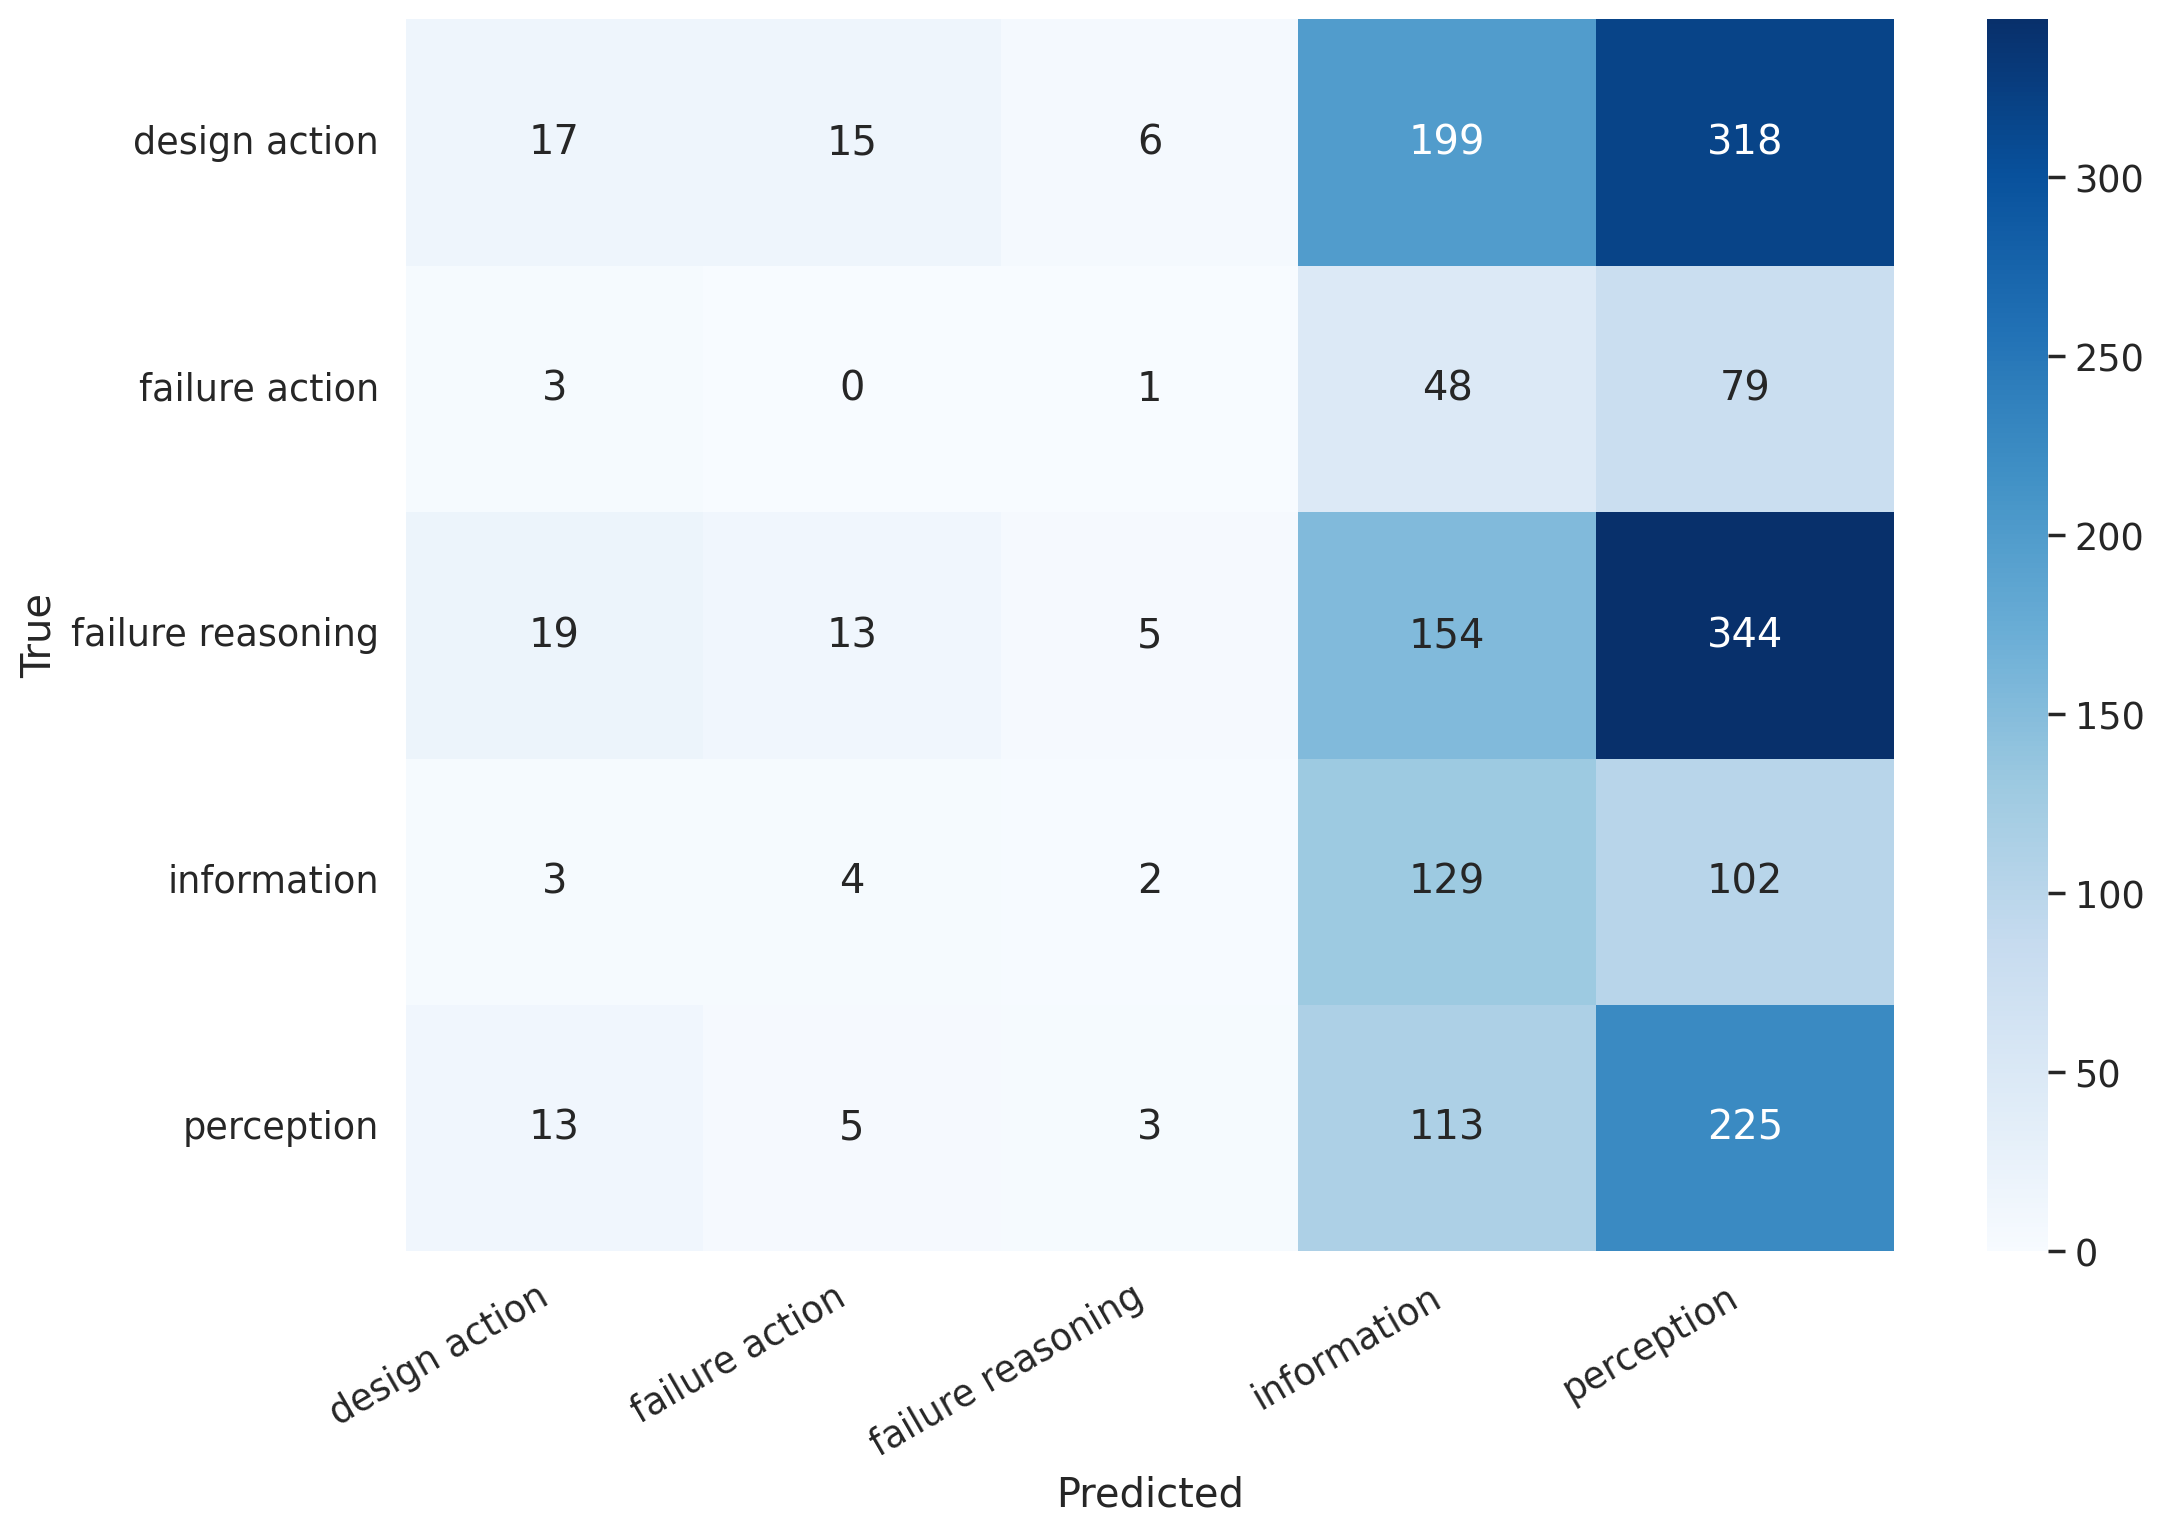

In [40]:
model_pipeline("typeform/distilbert-base-uncased-mnli", df_p, P_labels)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/config.json
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Model config DistilBertConfig {
  "_name_or_path": "typeform/distilbert-base-uncased-mnli",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "mnli",
  "hidden_dim": 3072,
  "id2label": {
    "0": "ENTAILMENT",
    "1": "NEUTRAL",
    "2": "CONTRADICTION"
  },
  "initializer_range": 0.02,
  "label2id": {
    "CONTRADICTION": 2,
    "ENTAILMENT": 0,
    "NEUTRAL": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0

'                     precision    recall  f1-score   support\n\n      clarification       0.26      0.91      0.40       605\n            failure       0.38      0.13      0.20       197\n     implementation       0.12      0.03      0.04       346\n       introduction       0.15      0.02      0.04       183\nworkshop management       1.00      0.00      0.00       944\n\n           accuracy                           0.26      2275\n          macro avg       0.38      0.22      0.14      2275\n       weighted avg       0.55      0.26      0.14      2275\n'

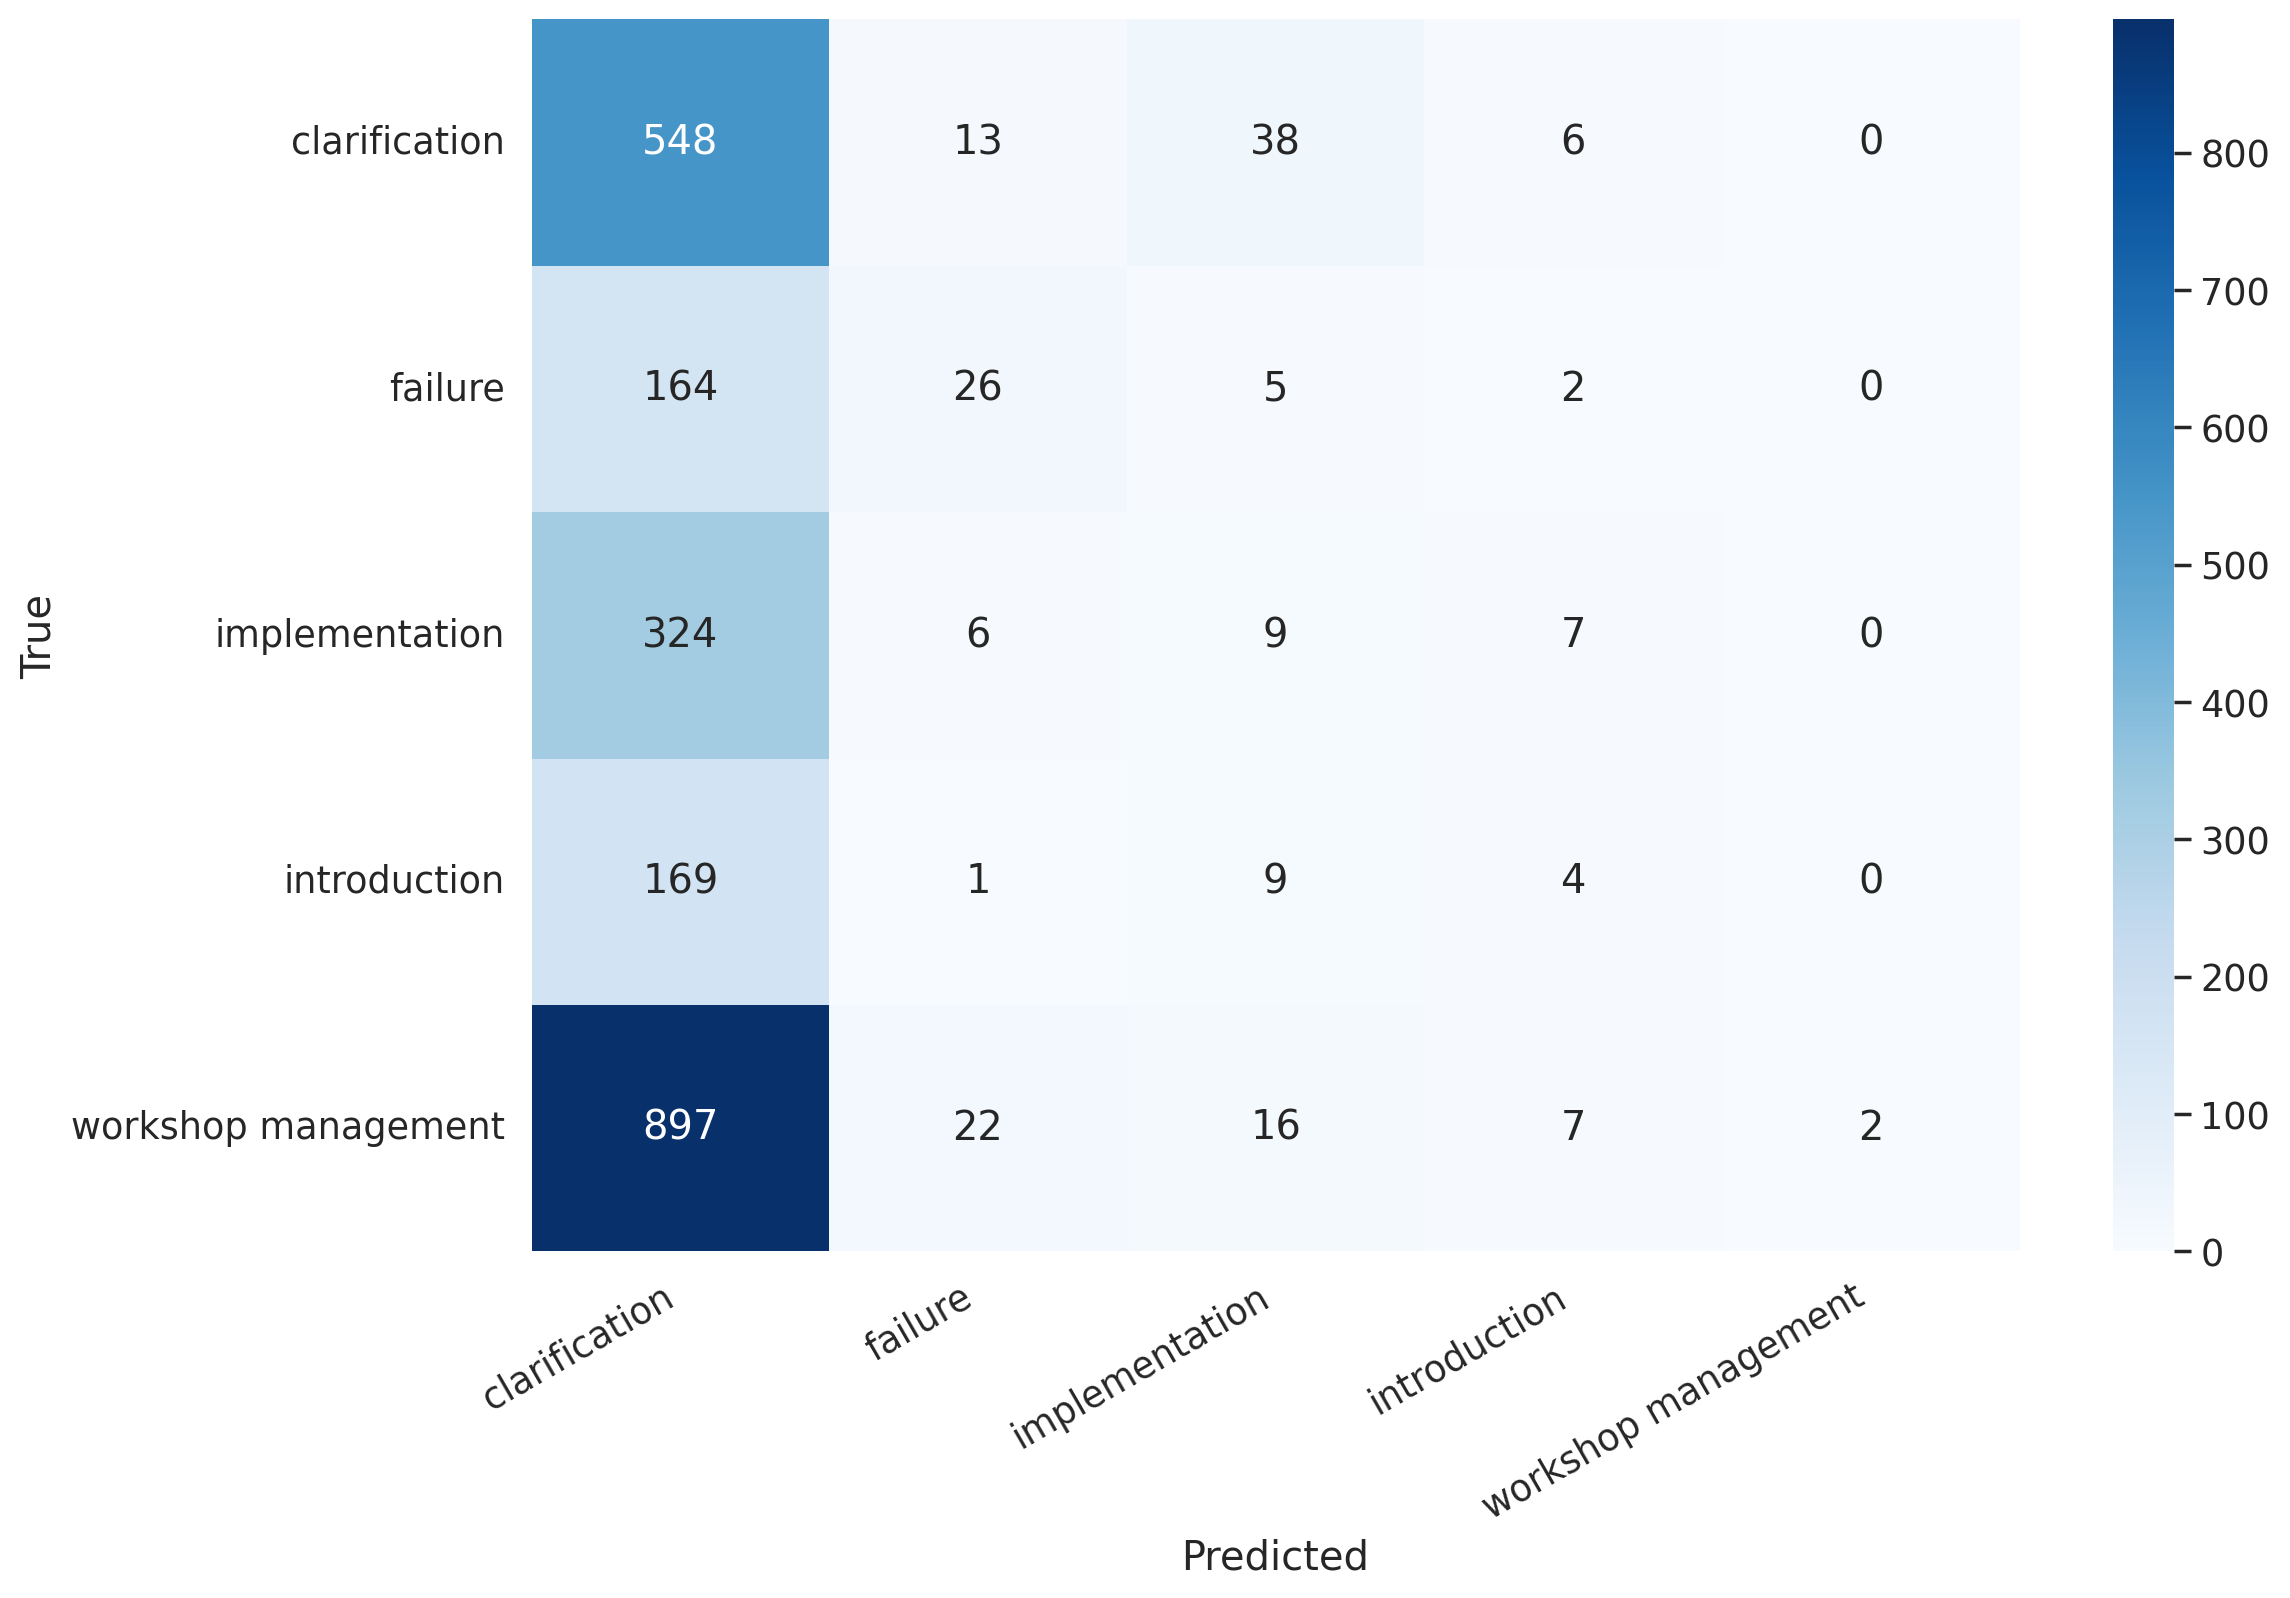

In [41]:
model_pipeline("typeform/distilbert-base-uncased-mnli", df_r, R_labels)